# Project 4: Prophet Time Series Price Commodity

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from prophet import Prophet

# Loading Data

In [124]:
avocado_df = pd.read_csv('C:/pandas/Prophet Time Series Price Commodity/avocado.csv')

# Explore Dataset

In [125]:
# Check the first 10 rows of the avocado dataset
avocado_df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [126]:
# Check the last 10 rows of the avocado dataset
avocado_df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [127]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [166]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,datetimestamp
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,2016-08-13 23:30:43.498273792
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,2015-01-04 00:00:00
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,2015-10-25 00:00:00
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,2016-08-14 00:00:00
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,2017-06-04 00:00:00
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,2018-03-25 00:00:00
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,NaN


In [128]:
# Sort the avocado dataset by date
avocado_df = avocado_df.sort_values('Date')
avocado_df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
2807,51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
1195,51,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


# Visualize the Data

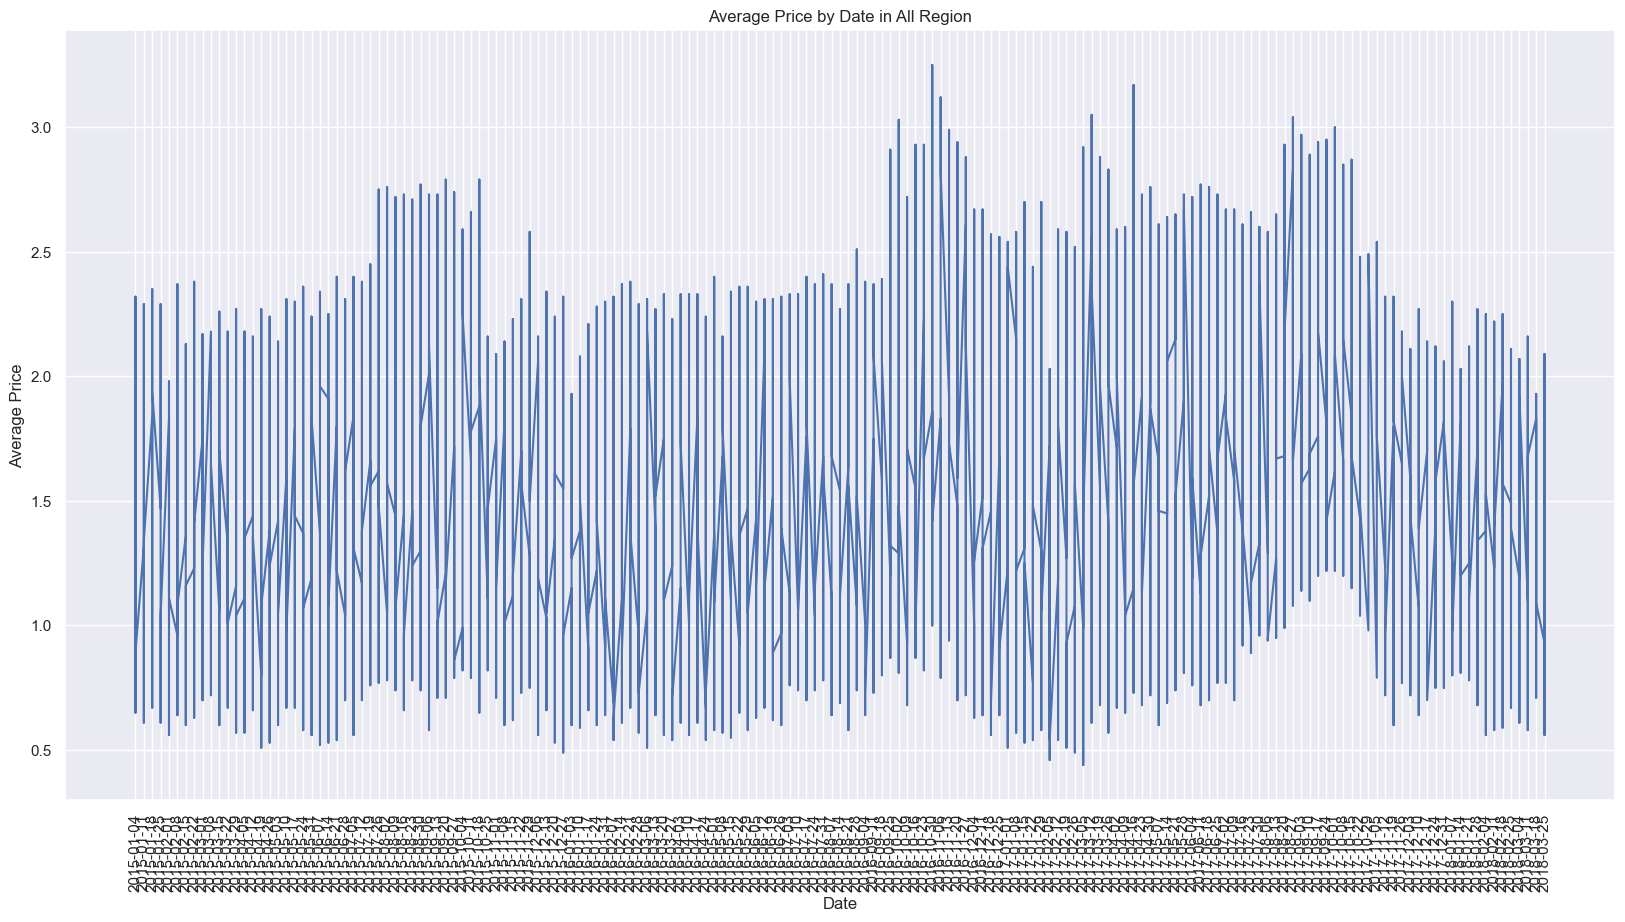

In [165]:
# Plot the average price by date
sns.set_theme(style = 'darkgrid')

plt.figure(figsize = (20,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])
plt.title('Average Price by Date in All Region')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation = 90)
plt.show()

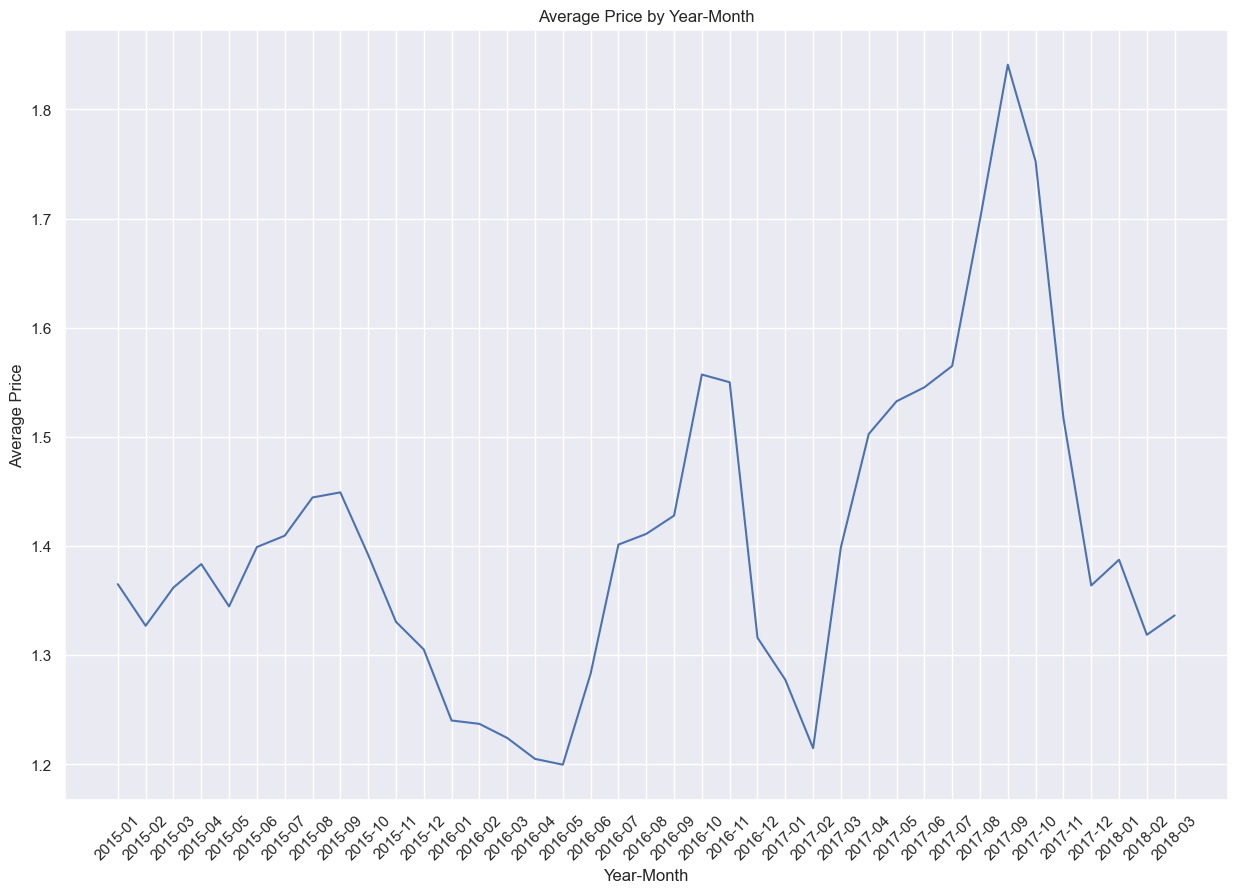

In [130]:
# Create the average by Year-Month
avocado_df['datetimestamp']= pd.to_datetime(avocado_df['Date'])
avocado_df['year month']= avocado_df['datetimestamp'].dt.to_period('M')

lineplot_df = avocado_df.groupby('year month')['AveragePrice'].mean().reset_index()
lineplot_df['year month'] = lineplot_df['year month'].astype(str)

plt.figure(figsize = (15,10))
sns.lineplot(x = 'year month', y = 'AveragePrice', data = lineplot_df)
plt.title('Average Price by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Price')
plt.xticks(rotation = 45)
plt.show()

```
Our analysis reveals a seasonal pattern in avocado pricing, with the average price rising during the summer and falling in the winter.
```

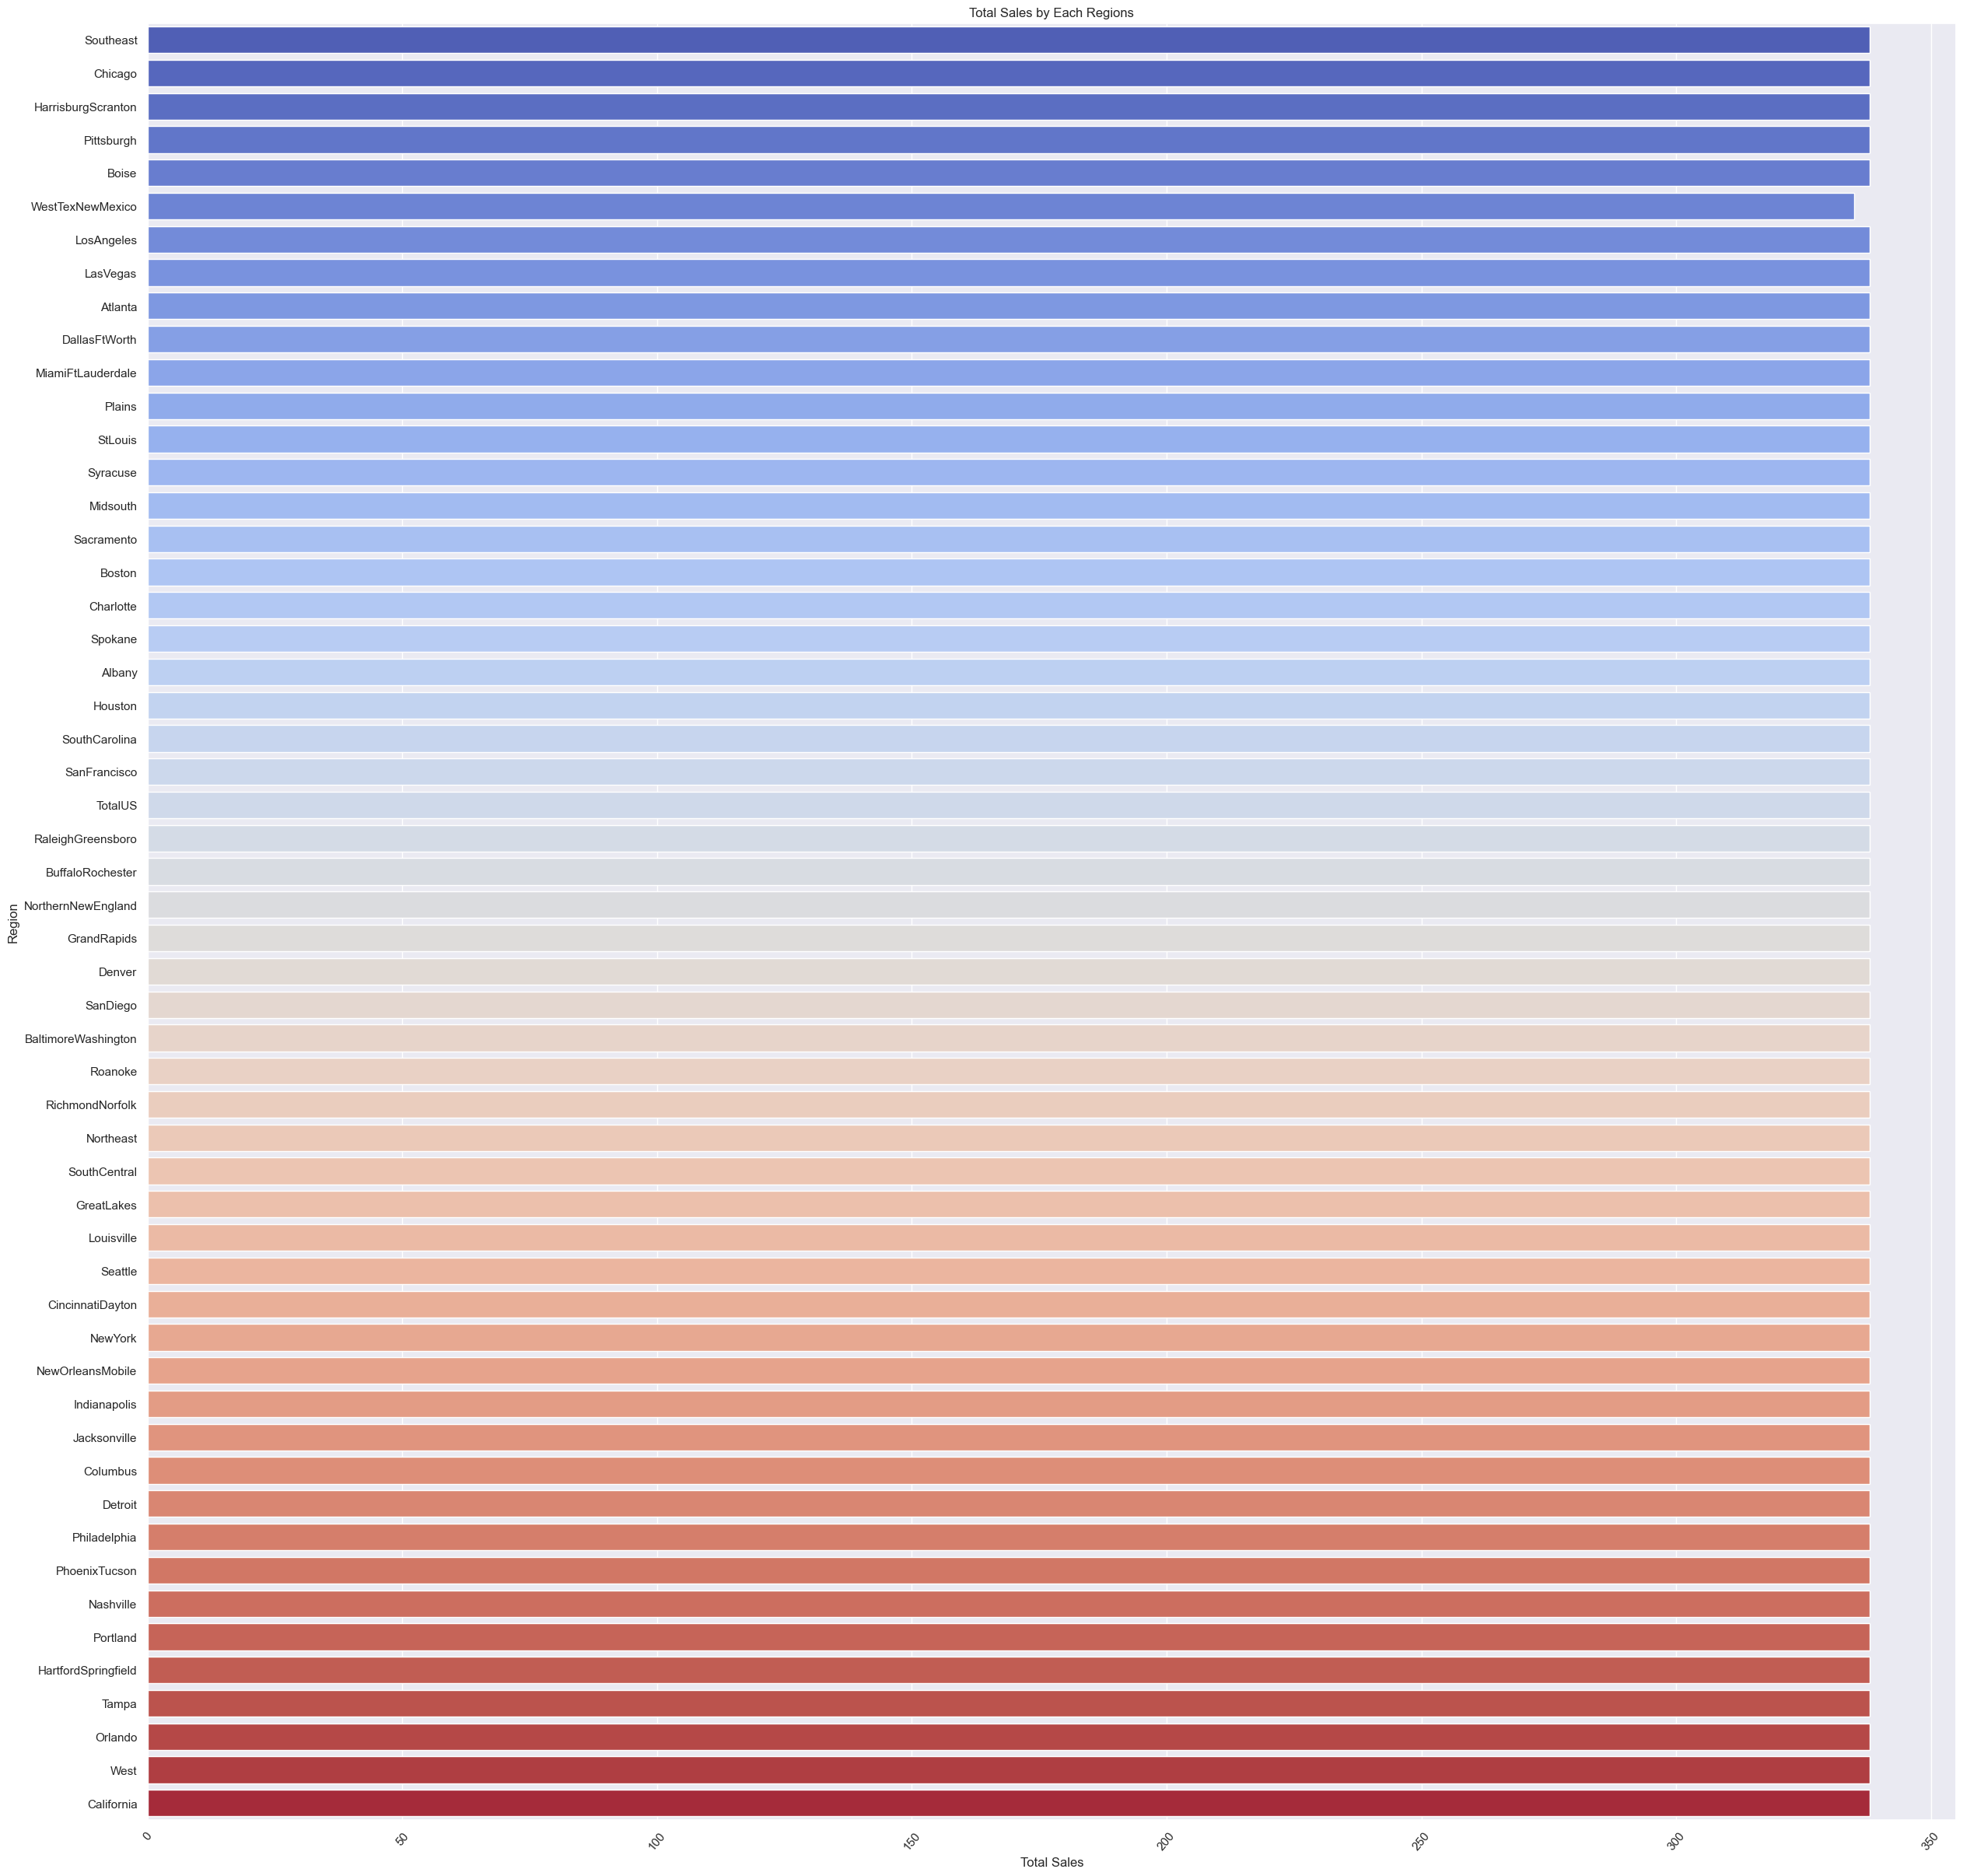

In [131]:
# To check IF our data balance or not
plt.figure(figsize = [30,30])
sns.countplot(y = 'region', data = avocado_df, hue = 'region',palette = 'coolwarm')
plt.title('Total Sales by Each Regions')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.xticks(rotation = 50)
plt.show();

```
The count plot indicates that our dataset is balanced across all regions, as the total sales in each region range between 300 and 350.
```

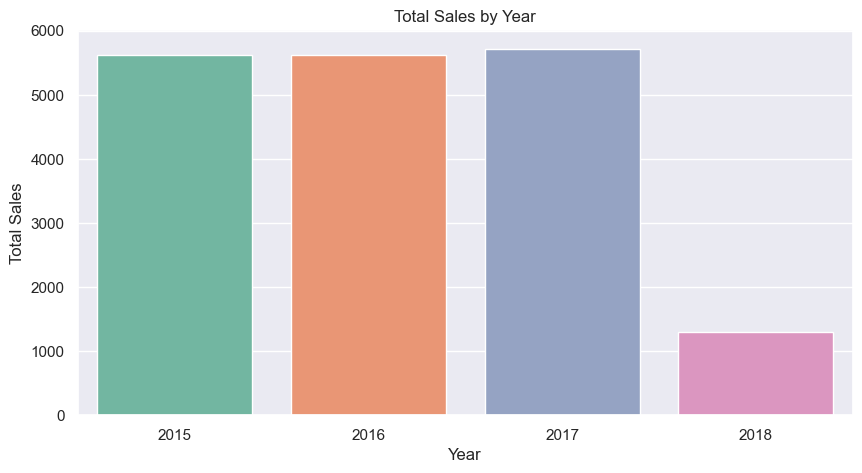

In [132]:
# Plot the total sales by year

plt.figure(figsize = (10,5))
sns.countplot(x = 'year', data = avocado_df, hue = 'year', palette = 'Set2', legend = False)
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

```
The bar plot shows that the total sales for each year are incomplete, as the data only extends up to March 2018.
```

# Prepare the Data, and Make Prediction for the price of Avocado in US
- (Split the data to training data and test data) 

In [185]:
# Prepare the data to meet Prophet's requirements
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [186]:
# For Prophet to operate, we need to have columns named 'ds' and 'y
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [187]:
avocado_prophet_df.head(10)

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
2807,2015-01-04,0.75
1195,2015-01-04,0.85
10269,2015-01-04,1.50
103,2015-01-04,1.00
1143,2015-01-04,0.80


In [135]:
# Train the model to predict the future
m = Prophet()
m.fit(avocado_prophet_df)

15:21:33 - cmdstanpy - INFO - Chain [1] start processing
15:21:37 - cmdstanpy - INFO - Chain [1] done processing


In [136]:
# Forecast the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [137]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.500304,0.893845,1.858614,1.500304,1.500304,-0.117910,-0.117910,-0.117910,-0.117910,-0.117910,-0.117910,0.0,0.0,0.0,1.382394
1,2015-01-11,1.494981,0.915842,1.870861,1.494981,1.494981,-0.109398,-0.109398,-0.109398,-0.109398,-0.109398,-0.109398,0.0,0.0,0.0,1.385583
2,2015-01-18,1.489658,0.881145,1.863595,1.489658,1.489658,-0.108945,-0.108945,-0.108945,-0.108945,-0.108945,-0.108945,0.0,0.0,0.0,1.380713
3,2015-01-25,1.484335,0.896058,1.854336,1.484335,1.484335,-0.127679,-0.127679,-0.127679,-0.127679,-0.127679,-0.127679,0.0,0.0,0.0,1.356655
4,2015-02-01,1.479011,0.855372,1.808203,1.479011,1.479011,-0.155659,-0.155659,-0.155659,-0.155659,-0.155659,-0.155659,0.0,0.0,0.0,1.323352
5,2015-02-08,1.473688,0.854663,1.766787,1.473688,1.473688,-0.169373,-0.169373,-0.169373,-0.169373,-0.169373,-0.169373,0.0,0.0,0.0,1.304315
6,2015-02-15,1.468365,0.841556,1.824559,1.468365,1.468365,-0.155316,-0.155316,-0.155316,-0.155316,-0.155316,-0.155316,0.0,0.0,0.0,1.313049
7,2015-02-22,1.463042,0.827205,1.807537,1.463042,1.463042,-0.123906,-0.123906,-0.123906,-0.123906,-0.123906,-0.123906,0.0,0.0,0.0,1.339136
8,2015-03-01,1.457719,0.880243,1.830116,1.457719,1.457719,-0.098204,-0.098204,-0.098204,-0.098204,-0.098204,-0.098204,0.0,0.0,0.0,1.359515
9,2015-03-08,1.452396,0.873389,1.818813,1.452396,1.452396,-0.090267,-0.090267,-0.090267,-0.090267,-0.090267,-0.090267,0.0,0.0,0.0,1.362129


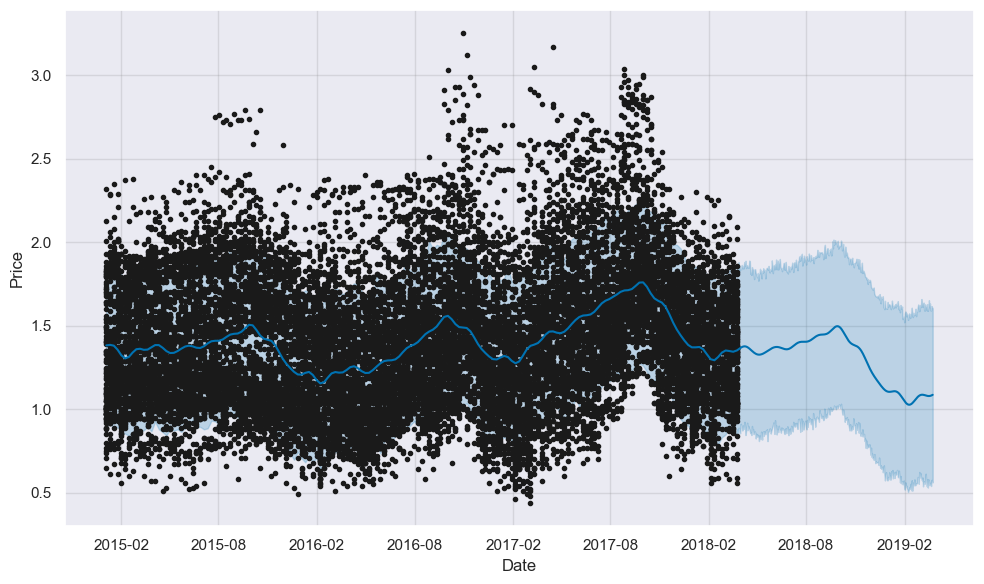

In [171]:
# Plot the Forecast of Avocado Prices in the U.S.
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

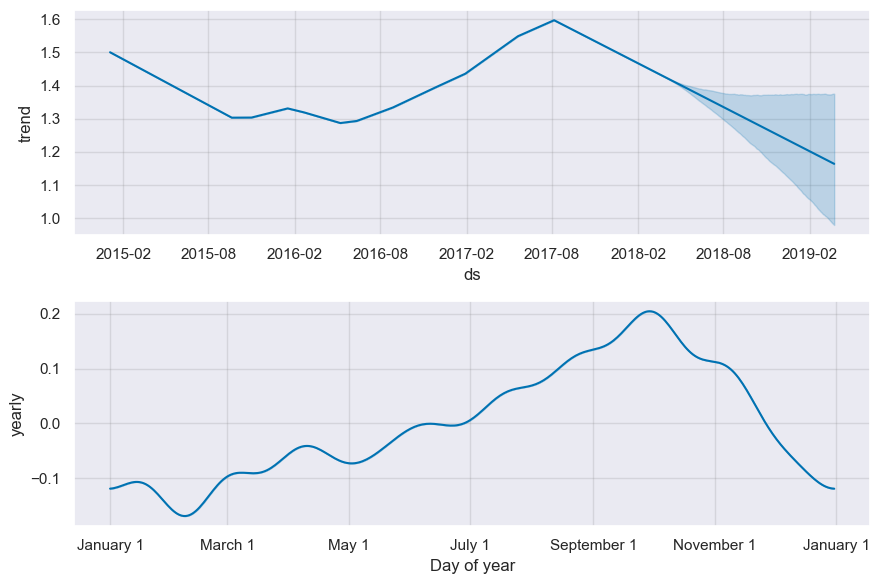

In [139]:
# Provide the expected trend (Yearly and Monthly)
figure = m.plot_components(forecast)

```
The prediction suggests that avocado prices will generally decline in the future. Additionally, the components plot confirms a seasonal trend, with higher prices during the summer and lower prices in the winter.
```

# Part 2 (Prediction for Specific Region in US)

In [173]:
# Filtering Avocado Data for the West Region
avocado_df_sample = avocado_df[avocado_df['region'] == 'West']

In [174]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

In [175]:
avocado_df_sample.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,datetimestamp,year month
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West,2015-01-04,2015-01
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West,2015-01-04,2015-01
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West,2015-01-11,2015-01
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West,2015-01-11,2015-01
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West,2015-01-18,2015-01
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West,2015-01-18,2015-01
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015,West,2015-01-25,2015-01
11878,48,2015-01-25,1.52,166494.38,61454.35,68624.86,749.30,35665.87,9756.03,25909.84,0.00,organic,2015,West,2015-01-25,2015-01
11877,47,2015-02-01,1.34,216484.22,89599.59,82183.07,184.99,44516.57,11083.16,33433.41,0.00,organic,2015,West,2015-02-01,2015-02
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015,West,2015-02-01,2015-02


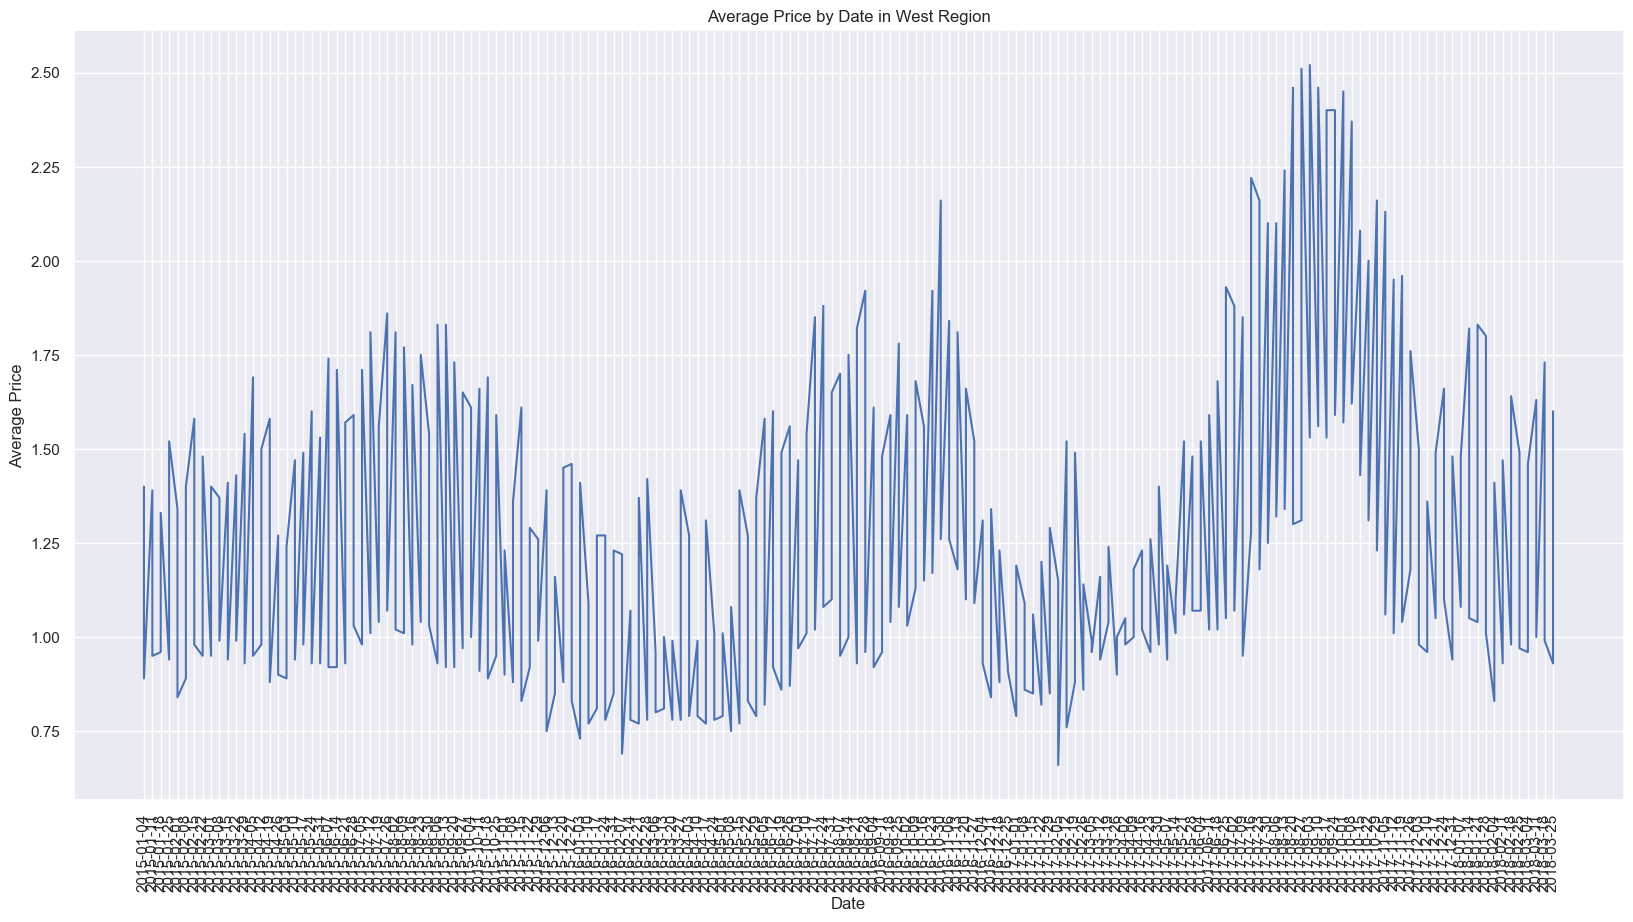

In [176]:
plt.figure(figsize = (20,10))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])
plt.title('Average Price by Date in West Region')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation = 90)
plt.show()

In [179]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [180]:
avocado_df_sample.head(10)

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,datetimestamp,year month
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West,2015-01-04,2015-01
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West,2015-01-04,2015-01
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West,2015-01-11,2015-01
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West,2015-01-11,2015-01
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West,2015-01-18,2015-01
11879,49,2015-01-18,1.33,251749.94,64328.76,147608.30,69.05,39743.83,7442.17,32301.66,0.00,organic,2015,West,2015-01-18,2015-01
2752,48,2015-01-25,0.94,5461313.90,2695157.56,2031937.97,71550.57,662667.80,521877.70,140735.66,54.44,conventional,2015,West,2015-01-25,2015-01
11878,48,2015-01-25,1.52,166494.38,61454.35,68624.86,749.30,35665.87,9756.03,25909.84,0.00,organic,2015,West,2015-01-25,2015-01
11877,47,2015-02-01,1.34,216484.22,89599.59,82183.07,184.99,44516.57,11083.16,33433.41,0.00,organic,2015,West,2015-02-01,2015-02
2751,47,2015-02-01,0.84,8362504.08,3531350.44,3872672.00,80893.53,877588.11,705333.64,172154.91,99.56,conventional,2015,West,2015-02-01,2015-02


In [181]:
m1 = Prophet()
m1.fit(avocado_df_sample)

16:03:29 - cmdstanpy - INFO - Chain [1] start processing
16:03:29 - cmdstanpy - INFO - Chain [1] done processing


In [182]:
future1 = m1.make_future_dataframe(periods = 365)
forecast1 = m1.predict(future1)

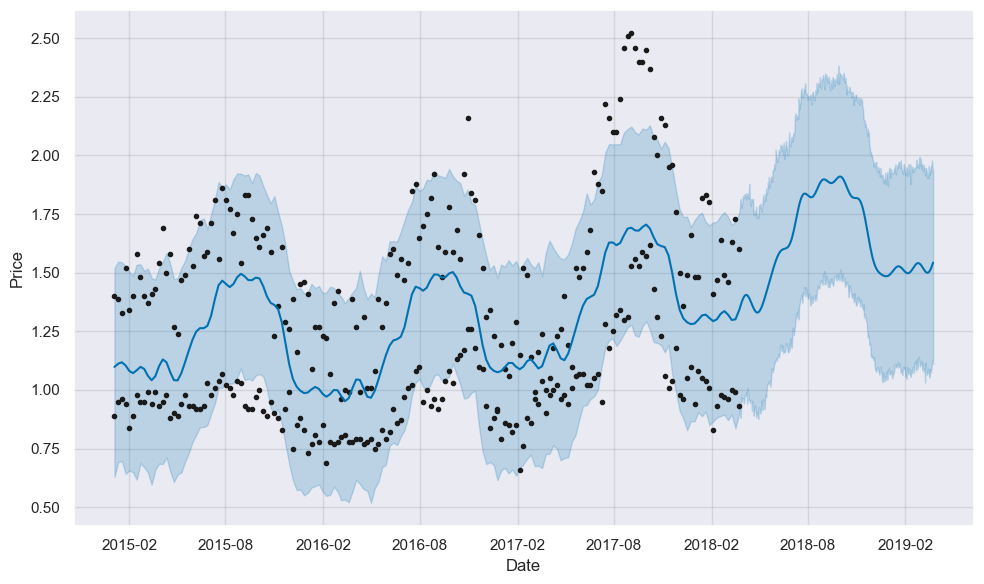

In [183]:
# Plot the Forecast of Avocado Prices in the West Region.
figure1 = m1.plot(forecast1, xlabel = 'Date', ylabel = 'Price')

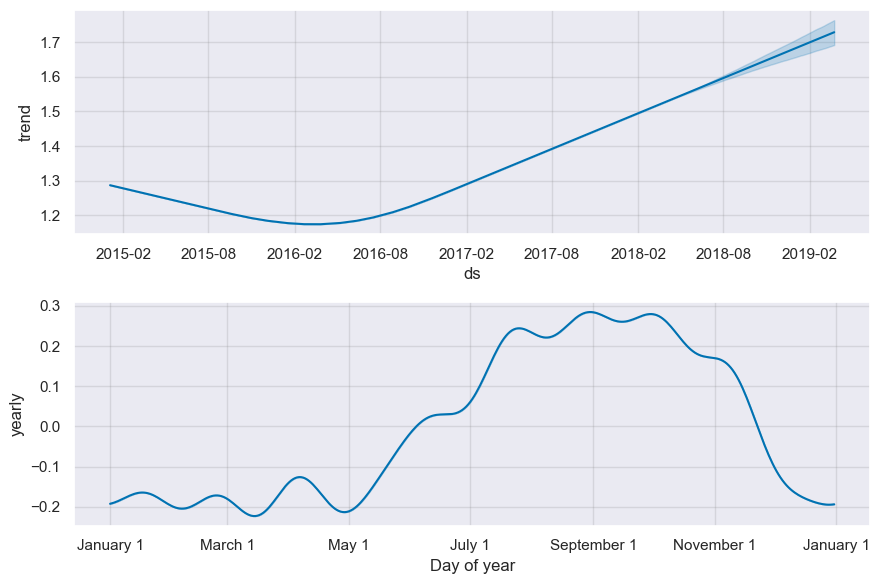

In [184]:
figure2 = m1.plot_components(forecast1)

```
In the West Region, we observe the same seasonal pattern. However, unlike the overall U.S. trend predicting a general price decrease, avocado prices in this region are expected to rise in the future.
```